https://projecteuler.net/problem=439

In [7]:
import os

def is_prime(n):
    for div in range(3, int(n**0.5)+1, 2):
        if n%div == 0:
            return 0
    return 1

def predata(n): # fill is_prime(n) for every n in range(3,limit+1,2)
    with open("439.txt", "w") as file:
        limit = int(n**0.5)
        for n in range(3,limit+1,2):
            file.write(str(is_prime(n)))
        limit += 2 - (limit+1)%2
        print(limit)
        while is_prime(limit) == 0:
            limit += 2
            file.write("0")
        file.write("1")

In [80]:
predata(10**11)

316229


In [8]:
class p439_v1():
    def __init__(self):
        pass
    
    def get_sum_div(self, n):
        res = 0
        for i in range(1, n+1):
            if n % i == 0:
                res += i
        return res
    
    def get_solution(self, n):
        total = 0
        for i in range(1, n+1):
            for j in range(1, n+1):
                res = self.get_sum_div(i*j)
                total += res
        return total

In [9]:
class p439_v2():
    def __init__(self):
        pass
    
    def get_sum_div(self, n):
        res = 0
        for i in range(1, int(n**0.5)+1):
            if n % i == 0:
                if i == n // i:
                    res += i
                else:
                    res += i + n // i
        return res
    
    def get_solution(self, n):
        total = 1
        for i in range(2, n+1):
            res = self.get_sum_div(i**2)
            total += res
        for i in range(1, n+1):
            for j in range(i+1, n+1):
                res = self.get_sum_div(i*j)
                total += res * 2
        return total

In [45]:
class p439_v3():
    def __init__(self):
        self.prime_list = []
        self.prime_amount = []
        pass
    
    def get_prime_factor(self, n):
        prime_list = []
        prime_amount = []
        if n % 2 == 0:
            prime_list.append(2)
            prime_amount.append(0)
            while n % 2 == 0:
                n //= 2
                prime_amount[-1] += 1
        div = 3
        while div**2 <= n:
            if n % div == 0:
                prime_list.append(div)
                prime_amount.append(0)
                while n % div == 0:
                    n //= div
                    prime_amount[-1] += 1
            div += 2
        if n > 1:
            prime_list.append(n)
            prime_amount.append(1)
        return prime_list, prime_amount
    
    def get_sum_div(self, n, to_prime, multiply=1):
        prime_list, prime_amount = self.get_prime_factor(to_prime)
        for idx, prime in enumerate(self.prime_list):
            if prime in prime_list:
                prime_amount[prime_list.index(prime)] += self.prime_amount[idx]
            else:
                prime_list.append(prime)
                prime_amount.append(self.prime_amount[idx])
        res = 0
        total_div = 1
        length = len(prime_amount)
        if multiply > 1:
            for idx in range(length):
                prime_amount[idx] *= multiply
        for amount in prime_amount:
            total_div *= amount+1
        
        table_count = [0] * length
        cursor = 0
        div = 1
        current_div = 1
        while current_div < total_div:
            res += div + n // div
            table_count[cursor] += 1
            if table_count[cursor] > prime_amount[cursor]:
                while table_count[cursor] > prime_amount[cursor]:
                    table_count[cursor] = 0
                    div = div // (prime_list[cursor] ** prime_amount[cursor])
                    cursor += 1
                    table_count[cursor] += 1
                div *= prime_list[cursor]
                cursor = 0
            else:
                div *= prime_list[cursor]
            current_div += 2
        if total_div % 2 == 1:
            res += div
        return res
    
    def get_solution(self, n):
        self.prime_list = []
        self.prime_amount = []
        total = 1
        for i in range(2, n+1):
            res = self.get_sum_div(i**2, i, 2)
            total += res
        for i in range(1, n+1):
            self.prime_list = []
            self.prime_amount = []
            self.prime_list, self.prime_amount = self.get_prime_factor(i)
            for j in range(i+1, n+1):
                res = self.get_sum_div(i*j, j)
                total += res * 2
        return total

In [64]:
class p439_v4():
    def __init__(self):
        self.prime_list = []
        self.prime_amount = []
        pass
    
    def get_prime_factor(self, n):
        prime_list = []
        prime_amount = []
        if n % 2 == 0:
            prime_list.append(2)
            prime_amount.append(0)
            while n % 2 == 0:
                n //= 2
                prime_amount[-1] += 1
        div = 3
        while div**2 <= n:
            if n % div == 0:
                prime_list.append(div)
                prime_amount.append(0)
                while n % div == 0:
                    n //= div
                    prime_amount[-1] += 1
            div += 2
        if n > 1:
            prime_list.append(n)
            prime_amount.append(1)
        return prime_list, prime_amount
    
    def get_sum_div(self, n, to_prime, multiply=1):
        prime_list, prime_amount = self.get_prime_factor(to_prime)
        for idx, prime in enumerate(self.prime_list):
            if prime in prime_list:
                prime_amount[prime_list.index(prime)] += self.prime_amount[idx]
            else:
                prime_list.append(prime)
                prime_amount.append(self.prime_amount[idx])
        
        res = 1
        for prime, amount in zip(prime_list, prime_amount):
            res *= (prime ** (amount*multiply+1) - 1) // (prime - 1)
        return res
    
    def get_solution(self, n):
        self.prime_list = []
        self.prime_amount = []
        total = 1
        for i in range(2, n+1):
            res = self.get_sum_div(i**2, i, 2)
            total += res
        for i in range(1, n+1):
            self.prime_list = []
            self.prime_amount = []
            self.prime_list, self.prime_amount = self.get_prime_factor(i)
            for j in range(i+1, n+1):
                res = self.get_sum_div(i*j, j)
                total += res * 2
        return total

In [68]:
import time

v1 = p439_v1().get_solution
v2 = p439_v2().get_solution
v3 = p439_v3().get_solution
v4 = p439_v4().get_solution
for i in range(100, 1001, 100):
    time_list = []
    res = []
    for v, algo in enumerate([v2, v3, v4]):
        start = time.time()
        res.append(algo(i))
        time_list.append(time.time() - start)
    if len(set(res)) != 1:
        print("Error in sol", res)
        input()
    else:
        print(i, time_list)

100 [0.02041769027709961, 0.03942513465881348, 0.018276214599609375]
200 [0.12390804290771484, 0.18248343467712402, 0.14729857444763184]
300 [0.46692442893981934, 0.4803178310394287, 0.20581984519958496]
400 [0.8389813899993896, 0.8720312118530273, 0.3633840084075928]
500 [1.6024651527404785, 1.456449031829834, 0.8174035549163818]
600 [3.7101712226867676, 2.249335527420044, 0.8885743618011475]
700 [4.384244680404663, 3.095513105392456, 1.1983635425567627]
800 [6.554259777069092, 4.169698476791382, 1.6187465190887451]
900 [10.2947518825531, 5.431070566177368, 2.0858514308929443]
1000 [13.043448448181152, 8.212351083755493, 2.847764253616333]


In [ ]:
def check_div_sum(prime_factor, prime_amount):
    res = 1
    for prime, amount in zip(prime_factor, prime_amount):
        res *= (prime ** (amount+1) - 1) // (prime - 1)
    return res

v2 = p439_v2()
v3 = p439_v3()
stop = 2
for i in range(4, 121):
    sum_div = v2.get_sum_div(i)
    prime_factor, prime_amount = v3.get_prime_factor(i)
    print(i, v3.get_prime_factor(i), v3.get_prime_factor(sum_div), sum_div, check_div_sum(prime_factor, prime_amount))

In [76]:
import matplotlib.pyplot as plt
import math
import time
from sys import stdout

def draw_single(x_start, x_end, y_end, x, all_y, colors):
    plt.axis([x_start, x_end, 0, y_end])
    for idx, y in enumerate(all_y):
        plt.scatter(x[:len(y)], y, color=colors[idx%len(colors)], s=1)
    plt.draw()
    plt.show()

def display_query(query):
    
    
def make_plot(x_start, x_end, timelimit, function_list, val_amount=1000, ko_time_average=1, ko_in_a_row=1, 
              path_to_save=None, colors=["red", "green", "blue", "orange", "grey", "purple", "black", "pink"]):
    distance = x_end - x_start
    step = max(distance / val_amount, 1)
    query = x_start
    realquery = query
    x = []
    all_y = []
    while query <= x_end:
        x.append(realquery)
        query += step
        realquery = int(query)
    length = len(x)
    x_end = 0
    
    res = "  query"
    for i in range(function_list):
        res += "  |  v"+str(i+1)
    print(res)
    
    for v, func in enumerate(function_list):
        y = []
        time_got = 0
        time_average = [0] * ko_time_average
        ko_amount = 0
        cpt = 0
        print("\n", str(v+1))
        while cpt < length and sum(time_average)/ko_time_average < timelimit and ko_amount < ko_in_a_row:
            query = x[cpt]
            time_start = time.time()
            res = func(query)
            time_got = time.time() - time_start
            y.append(time_got)
            
            if time_got > timelimit and time_average[cpt%ko_time_average] <= timelimit:
                ko_amount += 1
            if time_got < timelimit and time_average[cpt%ko_time_average] >= timelimit:
                ko_amount -= 1
            time_average[cpt%ko_time_average] = time_got
            cpt += 1
        all_y.append(y)
        
        if x_end < x[cpt-1]:
            x_end = x[cpt-1]
    print(x, all_y)
    draw_single(x_start, x_end, timelimit, x, all_y, colors)


 1
1 4.5299530029296875e-06 1
2 5.0067901611328125e-06 14
3 8.58306884765625e-06 59
4 1.5497207641601562e-05 190
5 2.6226043701171875e-05 401
6 5.888938903808594e-05 914
7 8.726119995117188e-05 1499
8 0.00010347366333007812 2632
9 0.00013589859008789062 4113
10 0.00018906593322753906 6424
11 0.0002827644348144531 8645
12 0.00041675567626953125 13284
13 0.0004744529724121094 17023
14 0.0006170272827148438 23092
15 0.0007793903350830078 30715
16 0.0009582042694091797 40484
17 0.0011508464813232422 48711
18 0.0014081001281738281 63890
19 0.0017242431640625 75351
20 0.0020906925201416016 95792
21 0.00249481201171875 116421
22 0.003060579299926758 139822
23 0.003560304641723633 159911
24 0.004182577133178711 199176
25 0.004823446273803711 229499
26 0.005785703659057617 267438
27 0.006848812103271484 309283
28 0.007968664169311523 364462
29 0.009042024612426758 404933
30 0.010518312454223633 482792
31 0.012639760971069336 532553
32 0.013837814331054688 611208
33 0.015188455581665039 688593


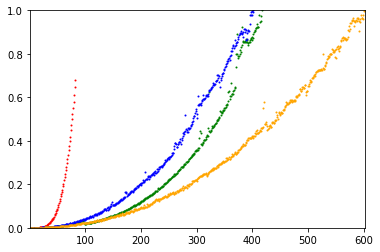

In [77]:
v1 = p439_v1().get_solution
v2 = p439_v2().get_solution
v3 = p439_v3().get_solution
v4 = p439_v4().get_solution
make_plot(1, 1000, 1, [v1,v2,v3,v4], 1000, 3, 3)